# MESSAGE DECODING FROM UNPOOLED SAMPLES (BUT COMBINED INTO MOCK POOLS)

### INPUT, LOAD SEQUENCES

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import scipy.stats

from turtles.turtles_utils import *

In [2]:
base_path = '/mnt/c/Users/jonst/Northwestern University/Tyo Lab - Shared group resources' \
            '/Publications Presentations & Proposals from Group/Manuscripts' \
            '/2022 - Callisto Strutz - tdt data storage'

#: Overall directory for TdT project data and analysis
tdt_dir = f'{base_path}/02 Analyzed data/'

#: Subdirectory for NGS run
data_dir = f'{base_path}/01 Raw data/20211109_barcoded_rec_1/data/rawDataSingles/'

#: Directory to save generated figures in
figure_dir = f'{base_path}/02 Analyzed data/preliminary_figures/Hello_World_1_mock_pooled/'

In [3]:
#import conditions table
conditions_df = pd.DataFrame()
conditions_df = pd.read_excel(f'{base_path}/01 Raw data/20211109_barcoded_rec_1/analysis/conditonsTable.xls', header=0)
conditions_df

,Filename,Sample,Category,Replicate,Timepoint,Condition,Position,Base_Condition
0,A1,1C,c,1,1,1,NaN,0
1,A2,2C,c,2,1,1,NaN,0
2,A3,4C,c,3,1,1,NaN,0
3,A4,6C,c,1,1,3,NaN,gg
4,A5,9c,c,2,1,3,NaN,gg
5,A6,10C,c,3,1,3,NaN,gg
6,A7,15C,c,1,1,4,NaN,t
7,A8,16C,c,2,1,4,NaN,t
8,A9,17C,c,3,1,4,NaN,t
9,A10,18C,c,1,0,6,NaN,0


In [4]:
# split controls and message
controls_df = conditions_df[conditions_df['Category']=='c']
message_df = conditions_df[conditions_df['Category']=='r']

controls_df = controls_df.reindex(columns=['Filename', 'Sample', 'Replicate'])
message_df = message_df.reindex(columns=['Filename','Sample', 'Replicate'])

In [5]:
controls_df

,Filename,Sample,Replicate
0,A1,1C,1
1,A2,2C,2
2,A3,4C,3
3,A4,6C,1
4,A5,9c,2
5,A6,10C,3
6,A7,15C,1
7,A8,16C,2
8,A9,17C,3
9,A10,18C,1


In [6]:
message_df

,Filename,Sample,Replicate
24,C1,1R,1
25,C2,2R,1
26,C3,4R,1
27,C4,6R,1
28,C5,9R,1
29,C6,10R,1
30,C7,15R,1
31,C8,16R,1
32,C9,17R,1
33,C10,18R,1


In [7]:
# hgRNA reverse complements
hgRNA_dict_rc = {'D21': 'CTTGGCCGTAGCGTGAC'}

seqs_dict, hgRNAs, barcodes, insert_barcodes = read_in_vivo_seqs_R2(data_dir, hgRNA_dict_rc)


Read 107373 sequences in A1_S1_L001_R2_001.fastq.gz ...
Number cut and inserted into: 12887
Average length (excluding 0-length seqs): 2.37


Read 100379 sequences in A10_S10_L001_R2_001.fastq.gz ...
Number cut and inserted into: 304
Average length (excluding 0-length seqs): 1.11


Read 110847 sequences in A11_S11_L001_R2_001.fastq.gz ...
Number cut and inserted into: 562
Average length (excluding 0-length seqs): 1.18


Read 80528 sequences in A12_S12_L001_R2_001.fastq.gz ...
Number cut and inserted into: 407
Average length (excluding 0-length seqs): 1.16


Read 96780 sequences in A2_S2_L001_R2_001.fastq.gz ...
Number cut and inserted into: 12039
Average length (excluding 0-length seqs): 2.25


Read 89092 sequences in A3_S3_L001_R2_001.fastq.gz ...
Number cut and inserted into: 11871
Average length (excluding 0-length seqs): 2.52


Read 96479 sequences in A4_S4_L001_R2_001.fastq.gz ...
Number cut and inserted into: 7293
Average length (excluding 0-length seqs): 2.56


Read 115858 seque

# COMBINE READS INTO MOCK POOL

In [8]:
control_seqs = []
control_hgRNAs = []
control_barcodes = []
control_insert_barcodes = []

message_seqs = []
message_hgRNAs = []
message_barcodes = []
message_insert_barcodes = []

for condition in seqs_dict:
    file_seqs = seqs_dict[condition]
    file_hgRNAs = hgRNAs[condition]
    file_barcodes = barcodes[condition]
    file_insert_barcodes = insert_barcodes[condition]
    
    if 'A' in condition or 'B' in condition:
        control_seqs += file_seqs
        control_hgRNAs += file_hgRNAs
        control_barcodes += file_barcodes
        control_insert_barcodes += file_insert_barcodes
    elif 'C' in condition or 'D' in condition:
        message_seqs += file_seqs
        message_hgRNAs += file_hgRNAs
        message_barcodes += file_barcodes
        message_insert_barcodes += file_insert_barcodes

In [9]:
len(control_seqs)

152617

In [10]:
len(message_seqs)

244074

In [11]:
seqs_dict = {}
hgRNAs = {}
barcodes = {}
insert_barcodes = {}

seqs_dict['Control'] = control_seqs
hgRNAs['Control'] = control_hgRNAs
barcodes['Control'] = control_barcodes
insert_barcodes['Control'] = control_insert_barcodes

seqs_dict['Message'] = message_seqs
hgRNAs['Message'] = message_hgRNAs
barcodes['Message'] = message_barcodes
insert_barcodes['Message'] = message_insert_barcodes

## BARCODE ANALYSIS

*update with code from pooled analysis to check barcodes on reads with inserts only*

In [12]:
barcode_df = pd.read_csv(f'{tdt_dir}/_decodingResources/BarcodeToPosition.csv')
barcode_df

,Position,Barcodes
0,1,AATTTTGCGG
1,2,TGACTTTTAA
2,3,TAACAGTATG
3,4,"TTTTTGTGAA,GTTATACTGT,CAACTCGGTC"
4,5,CAATTGTCAT
5,6,GCCGCTCAGT
6,7,TGCACGTCAT
7,8,GCGATCCCGG
8,9,AACCTAAGTT
9,10,ACTGCTCCCT


In [13]:
# count all barcodes
bc_counts_df = barcode_df.copy()

for cond_name in barcodes:
    filename = cond_name#.split('_')[0]
    file_barcodes = {}
    for barcode in barcodes[cond_name]:
        if barcode not in file_barcodes:
            file_barcodes[barcode] = 1
        else:
            file_barcodes[barcode] += 1
    
    counts = []
    for pos_barcodes in list(barcode_df.Barcodes):
        if ',' in pos_barcodes:  # comma-separated list of possible barcodes
            pos_barcodes = pos_barcodes.split(',')
        else:  # single barcode
            pos_barcodes = [pos_barcodes]
            
        count = 0
        for barcode in pos_barcodes:
            if barcode in file_barcodes:
                count += file_barcodes[barcode]
                
        counts.append(count)
    
    bc_counts_df[filename] = counts

In [14]:
bc_counts_df

,Position,Barcodes,Control,Message
0,1,AATTTTGCGG,92432,15878
1,2,TGACTTTTAA,77861,91618
2,3,TAACAGTATG,52630,66299
3,4,"TTTTTGTGAA,GTTATACTGT,CAACTCGGTC",76357,87758
4,5,CAATTGTCAT,91532,87257
5,6,GCCGCTCAGT,85570,108670
6,7,TGCACGTCAT,82646,83625
7,8,GCGATCCCGG,83076,71894
8,9,AACCTAAGTT,83529,72347
9,10,ACTGCTCCCT,96924,120753


In [15]:
bc_counts_df.to_csv(figure_dir + 'barcode_counts_all.csv')

In [16]:
# count barcodes for inserts only
bc_insert_counts_df = barcode_df.copy()

for cond_name in insert_barcodes:
    filename = cond_name.split('_')[0]
    file_barcodes = {}
    for barcode in insert_barcodes[cond_name]:
        if barcode not in file_barcodes:
            file_barcodes[barcode] = 1
        else:
            file_barcodes[barcode] += 1
    
    counts = []
    for pos_barcodes in list(barcode_df.Barcodes):
        if ',' in pos_barcodes:  # comma-separated list of possible barcodes
            pos_barcodes = pos_barcodes.split(',')
        else:  # single barcode
            pos_barcodes = [pos_barcodes]
            
        count = 0
        for barcode in pos_barcodes:
            if barcode in file_barcodes:
                count += file_barcodes[barcode]
                
        counts.append(count)
    
    bc_insert_counts_df[filename] = counts

In [17]:
bc_insert_counts_df

,Position,Barcodes,Control,Message
0,1,AATTTTGCGG,12184,742
1,2,TGACTTTTAA,10925,12589
2,3,TAACAGTATG,8111,7786
3,4,"TTTTTGTGAA,GTTATACTGT,CAACTCGGTC",6570,10354
4,5,CAATTGTCAT,9418,12649
5,6,GCCGCTCAGT,8042,685
6,7,TGCACGTCAT,10611,13780
7,8,GCGATCCCGG,8881,274
8,9,AACCTAAGTT,275,7252
9,10,ACTGCTCCCT,541,12225


In [18]:
bc_insert_counts_df.to_csv(figure_dir + 'barcode_counts_inserts.csv')

# SEQUENCE ANALYSIS

In [19]:
controls_seq_dfs = []
message_seq_dfs = []

controls_filenames = []
message_filenames = []

for filename in seqs_dict:
    
    if filename == 'Control':
        controls_filenames.append(filename)
        controls_seq_df = pd.DataFrame()
        controls_seq_df['Sequence'] = seqs_dict[filename]
        controls_seq_df['hgRNA'] = hgRNAs[filename]
        controls_seq_df['Filename'] = filename
        controls_seq_df['Barcode'] = insert_barcodes[filename]
        controls_seq_dfs.append(controls_seq_df)
    else:
        message_seq_df = pd.DataFrame()
        message_filenames.append(filename)
        message_seq_df['Sequence'] = seqs_dict[filename]
        message_seq_df['hgRNA'] = hgRNAs[filename]
        message_seq_df['Filename'] = filename
        message_seq_df['Barcode'] = insert_barcodes[filename]
        message_seq_dfs.append(message_seq_df)

In [20]:
controls_seq_dfs

[       Sequence hgRNA Filename     Barcode
 0           GAC   D21  Control  AATTTTGCGG
 1             G   D21  Control  AATTTTGCGG
 2             G   D21  Control  AATTTTGCGG
 3            CC   D21  Control  AATTTTGCGG
 4           GGT   D21  Control  AATTTTGCGG
 ...         ...   ...      ...         ...
 152612        G   D21  Control  TCTTAGCATT
 152613       GG   D21  Control  TCTTAGCATT
 152614    GGGTC   D21  Control  TCTTAGCATT
 152615       CC   D21  Control  TCTTAGCATT
 152616   GGGCCT   D21  Control  TCTTAGGATT
 
 [152617 rows x 4 columns]]

In [21]:
message_seq_dfs

[       Sequence hgRNA Filename     Barcode
 0             G   D21  Message  AATTTTGCGG
 1             G   D21  Message  GATATACTGA
 2          GCCG   D21  Message  AATTTTGCGG
 3         GGGGC   D21  Message  TCAGGATCCC
 4          GCCG   D21  Message  AATTTTGCGG
 ...         ...   ...      ...         ...
 244069        G   D21  Message  TCTTAGCATT
 244070        G   D21  Message  TCTTAGCATT
 244071        A   D21  Message  TCTTAGCATT
 244072        G   D21  Message  TCTTAGCATT
 244073       AG   D21  Message  TCTTAGCATT
 
 [244074 rows x 4 columns]]

In [22]:
for seq_dfs in [controls_seq_dfs, message_seq_dfs]:
    for df in seq_dfs:
        if df['Sequence'].any():
            lengths = df.apply(lambda x: len(x['Sequence']), axis=1)
            df['Length'] = lengths

In [23]:
controls_seq_dfs[0]

,Sequence,hgRNA,Filename,Barcode,Length
0,GAC,D21,Control,AATTTTGCGG,3
1,G,D21,Control,AATTTTGCGG,1
2,G,D21,Control,AATTTTGCGG,1
3,CC,D21,Control,AATTTTGCGG,2
4,GGT,D21,Control,AATTTTGCGG,3
...,...,...,...,...,...
152612,G,D21,Control,TCTTAGCATT,1
152613,GG,D21,Control,TCTTAGCATT,2
152614,GGGTC,D21,Control,TCTTAGCATT,5
152615,CC,D21,Control,TCTTAGCATT,2


In [24]:
controls_df

,Filename,Sample,Replicate
0,A1,1C,1
1,A2,2C,2
2,A3,4C,3
3,A4,6C,1
4,A5,9c,2
5,A6,10C,3
6,A7,15C,1
7,A8,16C,2
8,A9,17C,3
9,A10,18C,1


In [25]:
controls_df = pd.DataFrame()
controls_df['Filename'] = ['Control']
controls_df['Sample'] = ['Control']
controls_df['Replicate'] = 1
controls_df

,Filename,Sample,Replicate
0,Control,Control,1


In [26]:
message_df = pd.DataFrame()
message_df['Filename'] = ['Message']
message_df['Sample'] = ['Message']
message_df['Replicate'] = 1
message_df

,Filename,Sample,Replicate
0,Message,Message,1


In [27]:
controls_filenames = ['Control']
message_filenames = ['Message']

In [28]:
for df, filename in zip(controls_seq_dfs, controls_filenames):
    mean_length = df.Length.mean()
    count = len(df)
    
    #print(filename, mean_length, len(df))
    
    sd_length = df.Length.std()
    controls_df.loc[controls_df.Filename == filename, 'Avg_Length'] = mean_length
    controls_df.loc[controls_df.Filename == filename, 'Std_Length'] = sd_length
    
    #add counts
    controls_df.loc[controls_df.Filename == filename, 'count'] = count

In [29]:
for df, filename in zip(message_seq_dfs, message_filenames):
    mean_length = df.Length.mean()
    #print(filename, mean_length, len(df.Length))
    count = len(df)

    
    sd_length = df.Length.std()
    message_df.loc[message_df.Filename == filename, 'Avg_Length'] = mean_length
    message_df.loc[message_df.Filename == filename, 'Std_Length'] = sd_length
    
        
    #add counts
    message_df.loc[message_df.Filename == filename, 'count'] = count

In [30]:
#Alec - I reset indices here 
controls_df = controls_df.reset_index(drop=True)
controls_df

,Filename,Sample,Replicate,Avg_Length,Std_Length,count
0,Control,Control,1,2.495711,1.803741,152617.0


In [31]:
message_df

,Filename,Sample,Replicate,Avg_Length,Std_Length,count
0,Message,Message,1,2.574875,1.816339,244074.0


In [32]:
def count_bases(seq, base):
    count = seq.count(base)
    return count

In [33]:
for df in controls_seq_dfs:
    if len(df) == 0:
        continue
    print('\n', df.Filename.unique()[0])

    # Count A, C, G, T
    print('Counting bases...')
    for base in ['A', 'C', 'G', 'T']:
        df[base] = df.apply(lambda x: count_bases(x['Sequence'], base), axis=1)


 Control
Counting bases...


In [34]:
for df in message_seq_dfs:
    if len(df) == 0:
        continue
    print('\n', df.Filename.unique()[0])

    # Count A, C, G, T
    print('Counting bases...')
    for base in ['A', 'C', 'G', 'T']:
        df[base] = df.apply(lambda x: count_bases(x['Sequence'], base), axis=1)


 Message
Counting bases...


In [35]:
controls_seq_dfs[0]

,Sequence,hgRNA,Filename,Barcode,Length,A,C,G,T
0,GAC,D21,Control,AATTTTGCGG,3,1,1,1,0
1,G,D21,Control,AATTTTGCGG,1,0,0,1,0
2,G,D21,Control,AATTTTGCGG,1,0,0,1,0
3,CC,D21,Control,AATTTTGCGG,2,0,2,0,0
4,GGT,D21,Control,AATTTTGCGG,3,0,0,2,1
...,...,...,...,...,...,...,...,...,...
152612,G,D21,Control,TCTTAGCATT,1,0,0,1,0
152613,GG,D21,Control,TCTTAGCATT,2,0,0,2,0
152614,GGGTC,D21,Control,TCTTAGCATT,5,0,1,3,1
152615,CC,D21,Control,TCTTAGCATT,2,0,2,0,0


In [36]:
controls_cond_df = pd.read_csv(f'{tdt_dir}/_decodingResources/BarcodeToCondition.csv')
controls_cond_df

,Condition,Base,Barcodes
0,1,0,AATTTTGCGG
1,1,0,TGACTTTTAA
2,1,0,TAACAGTATG
3,2,g,AGTTTTTCAA
4,2,g,GGTTACACTT
5,2,g,TCTTAGCATT
6,3,gg,"TTTTTGTGAA,GTTATACTGT,CAACTCGGTC"
7,3,gg,CAATTGTCAT
8,3,gg,GCCGCTCAGT
9,4,t,TATAGCCACC


In [37]:
controls_bc_df = pd.DataFrame()

all_filenames = []
all_barcodes = []
all_conditions = []
all_a_pcts = []
all_c_pcts = []
all_g_pcts = []
all_t_pcts = []
all_lengths = []

for df, filename in zip(controls_seq_dfs, controls_filenames):
    filenames = []
    sub_barcodes = []
    conditions = []
    a_pcts = []
    c_pcts = []
    g_pcts = []
    t_pcts = []
    lengths = []

    for file_barcodes, condition in zip(controls_cond_df.Barcodes, controls_cond_df.Condition):
        if ',' in file_barcodes:
            file_barcodes = file_barcodes.split(',')
        else:
            file_barcodes = [file_barcodes]
            
        a = 0
        c = 0
        g = 0
        t = 0
        n_seqs = 0

        for barcode in file_barcodes:
            sub_df = df.loc[df.Barcode == barcode]

            a += sub_df.A.sum()
            c += sub_df.C.sum()
            g += sub_df.G.sum()
            t += sub_df['T'].sum()  # .T is transpose
            n_seqs += len(sub_df)

        if not a:
            a = 1
        if not c:
            c = 1
        if not g:
            g = 1
        if not t:
            t = 1
        if not n_seqs:
            n_seqs = 999999999

        total = a + c + g + t
        avg_len = total / n_seqs

        filenames.append(filename)
        sub_barcodes.append(','.join(file_barcodes))
        conditions.append(condition)
        a_pcts.append(a / total)
        c_pcts.append(c / total)
        g_pcts.append(g / total)
        t_pcts.append(t / total)
        lengths.append(avg_len)
        
    all_filenames += filenames
    all_barcodes += sub_barcodes
    all_conditions += conditions
    all_a_pcts += a_pcts
    all_c_pcts += c_pcts
    all_g_pcts += g_pcts
    all_t_pcts += t_pcts
    all_lengths += lengths
        
controls_bc_df['Filename'] = all_filenames
controls_bc_df['Barcodes'] = all_barcodes
controls_bc_df['Condition'] = all_conditions
controls_bc_df['A%'] = all_a_pcts
controls_bc_df['C%'] = all_c_pcts
controls_bc_df['G%'] = all_g_pcts
controls_bc_df['T%'] = all_t_pcts
controls_bc_df['Length'] = all_lengths

In [38]:
controls_bc_df

,Filename,Barcodes,Condition,A%,C%,G%,T%,Length
0,Control,AATTTTGCGG,1,0.135076,0.237882,0.558091,0.068951,2.380663
1,Control,TGACTTTTAA,1,0.108198,0.259366,0.535040,0.097395,2.245217
2,Control,TAACAGTATG,1,0.110600,0.273327,0.520516,0.095557,2.466897
3,Control,AGTTTTTCAA,2,0.084250,0.271443,0.570239,0.074067,2.378713
4,Control,GGTTACACTT,2,0.084703,0.273646,0.573650,0.068002,2.475653
5,Control,TCTTAGCATT,2,0.081205,0.283344,0.565542,0.069908,2.344722
6,Control,"TTTTTGTGAA,GTTATACTGT,CAACTCGGTC",3,0.018632,0.404438,0.551415,0.025515,2.565145
7,Control,CAATTGTCAT,3,0.029499,0.381278,0.566214,0.023009,2.699618
8,Control,GCCGCTCAGT,3,0.024243,0.363225,0.577253,0.035279,2.692862
9,Control,TATAGCCACC,4,0.123244,0.251563,0.505112,0.120081,2.487194


In [39]:
message_bc_df = pd.DataFrame()

all_filenames = []
all_barcodes = []
all_positions = []
all_a_pcts = []
all_c_pcts = []
all_g_pcts = []
all_t_pcts = []
all_lengths = []

for df, filename in zip(message_seq_dfs, message_filenames):
    filenames = []
    sub_barcodes = []
    positions = []
    a_pcts = []
    c_pcts = []
    g_pcts = []
    t_pcts = []
    lengths = []

    for file_barcodes, position in zip(barcode_df.Barcodes, barcode_df.Position):
        if ',' in file_barcodes:
            file_barcodes = file_barcodes.split(',')
        else:
            file_barcodes = [file_barcodes]
    
        a = 0
        c = 0
        g = 0
        t = 0
        n_seqs = 0
        for barcode in file_barcodes:
            sub_df = df.loc[df.Barcode == barcode]

            a += sub_df.A.sum()
            c += sub_df.C.sum()
            g += sub_df.G.sum()
            t += sub_df['T'].sum()
            n_seqs += len(sub_df)

        if not a:
            a = 1
        if not c:
            c = 1
        if not g:
            g = 1
        if not t:
            t = 1
        if not n_seqs:
            n_seqs = 99999999  # To get 0 for avg length

        total = a + c + g + t
        avg_len = total / n_seqs

        filenames.append(filename)
        sub_barcodes.append(file_barcodes)
        positions.append(position)
        a_pcts.append(a / total)
        c_pcts.append(c / total)
        g_pcts.append(g / total)
        t_pcts.append(t / total)
        lengths.append(avg_len)
        
    all_filenames += filenames
    all_barcodes += sub_barcodes
    all_positions += positions
    all_a_pcts += a_pcts
    all_c_pcts += c_pcts
    all_g_pcts += g_pcts
    all_t_pcts += t_pcts
    all_lengths += lengths
        
message_bc_df['Filename'] = all_filenames
message_bc_df['Barcode'] = all_barcodes
message_bc_df['Position'] = all_positions
message_bc_df['A%'] = all_a_pcts
message_bc_df['C%'] = all_c_pcts
message_bc_df['G%'] = all_g_pcts
message_bc_df['T%'] = all_t_pcts
message_bc_df['Length'] = all_lengths

In [40]:
message_bc_df

,Filename,Barcode,Position,A%,C%,G%,T%,Length
0,Message,[AATTTTGCGG],1,0.090909,0.306693,0.522478,0.079920,2.698113
1,Message,[TGACTTTTAA],2,0.079590,0.281665,0.585291,0.053455,2.550004
2,Message,[TAACAGTATG],3,0.110228,0.269088,0.537687,0.082997,2.358335
3,Message,"[TTTTTGTGAA, GTTATACTGT, CAACTCGGTC]",4,0.175842,0.225732,0.423572,0.174854,2.638594
4,Message,[CAATTGTCAT],5,0.081229,0.275712,0.582975,0.060083,2.332912
5,Message,[GCCGCTCAGT],6,0.090909,0.048864,0.817045,0.043182,1.284672
6,Message,[TGCACGTCAT],7,0.090242,0.286423,0.556394,0.066941,2.500943
7,Message,[GCGATCCCGG],8,0.117450,0.067114,0.808725,0.006711,1.087591
8,Message,[AACCTAAGTT],9,0.019144,0.415775,0.545608,0.019473,2.938776
9,Message,[ACTGCTCCCT],10,0.021461,0.370324,0.570270,0.037944,2.744294


In [41]:
aitch_pcts = pd.DataFrame(clr(controls_bc_df.loc[:, ['A%', 'C%', 'G%', 'T%']]),
                          columns=['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch'])
controls_bc_df = pd.concat([controls_bc_df, aitch_pcts], axis=1)
controls_bc_df

,Filename,Barcodes,Condition,A%,C%,G%,T%,Length,A_aitch,C_aitch,G_aitch,T_aitch
0,Control,AATTTTGCGG,1,0.135076,0.237882,0.558091,0.068951,2.380663,-0.328049,0.237891,1.090640,-1.000483
1,Control,TGACTTTTAA,1,0.108198,0.259366,0.535040,0.097395,2.245217,-0.591864,0.282411,1.006511,-0.697057
2,Control,TAACAGTATG,1,0.110600,0.273327,0.520516,0.095557,2.466897,-0.576861,0.327885,0.972037,-0.723061
3,Control,AGTTTTTCAA,2,0.084250,0.271443,0.570239,0.074067,2.378713,-0.738354,0.431611,1.173913,-0.867170
4,Control,GGTTACACTT,2,0.084703,0.273646,0.573650,0.068002,2.475653,-0.716483,0.456200,1.196386,-0.936102
5,Control,TCTTAGCATT,2,0.081205,0.283344,0.565542,0.069908,2.344722,-0.760176,0.489510,1.180633,-0.909968
6,Control,"TTTTTGTGAA,GTTATACTGT,CAACTCGGTC",3,0.018632,0.404438,0.551415,0.025515,2.565145,-1.694913,1.382722,1.692711,-1.380521
7,Control,CAATTGTCAT,3,0.029499,0.381278,0.566214,0.023009,2.699618,-1.316340,1.242849,1.638292,-1.564801
8,Control,GCCGCTCAGT,3,0.024243,0.363225,0.577253,0.035279,2.692862,-1.563060,1.143846,1.607105,-1.187891
9,Control,TATAGCCACC,4,0.123244,0.251563,0.505112,0.120081,2.487194,-0.524536,0.188993,0.886079,-0.550535


In [42]:
aitch_pcts = pd.DataFrame(clr(message_bc_df.loc[:, ['A%', 'C%', 'G%', 'T%']]),
                          columns=['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch'])

message_bc_df = pd.concat([message_bc_df.reset_index(), aitch_pcts], axis=1)
message_bc_df

,index,Filename,Barcode,Position,A%,C%,G%,T%,Length,A_aitch,C_aitch,G_aitch,T_aitch
0,0,Message,[AATTTTGCGG],1,0.090909,0.306693,0.522478,0.079920,2.698113,-0.708969,0.507019,1.039753,-0.837802
1,1,Message,[TGACTTTTAA],2,0.079590,0.281665,0.585291,0.053455,2.550004,-0.715248,0.548580,1.279972,-1.113304
2,2,Message,[TAACAGTATG],3,0.110228,0.269088,0.537687,0.082997,2.358335,-0.548371,0.344121,1.036357,-0.832108
3,3,Message,"[TTTTTGTGAA, GTTATACTGT, CAACTCGGTC]",4,0.175842,0.225732,0.423572,0.174854,2.638594,-0.280817,-0.031053,0.598323,-0.286453
4,4,Message,[CAATTGTCAT],5,0.081229,0.275712,0.582975,0.060083,2.332912,-0.722850,0.499230,1.248015,-1.024395
5,5,Message,[GCCGCTCAGT],6,0.090909,0.048864,0.817045,0.043182,1.284672,-0.207642,-0.828468,1.988193,-0.952082
6,6,Message,[TGCACGTCAT],7,0.090242,0.286423,0.556394,0.066941,2.500943,-0.668822,0.486156,1.150163,-0.967497
7,7,Message,[GCGATCCCGG],8,0.117450,0.067114,0.808725,0.006711,1.087591,0.373092,-0.186524,2.302541,-2.489109
8,8,Message,[AACCTAAGTT],9,0.019144,0.415775,0.545608,0.019473,2.938776,-1.611266,1.466882,1.738638,-1.594254
9,9,Message,[ACTGCTCCCT],10,0.021461,0.370324,0.570270,0.037944,2.744294,-1.674470,1.173664,1.605396,-1.104590


In [43]:
controls_bc_df.to_csv(figure_dir + 'controls_pcts.csv')

In [44]:
message_bc_df.to_csv(figure_dir + 'message_pcts.csv')

In [45]:
numeric_only = controls_bc_df.loc[:, ['Condition', 'Length', 'A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']]

In [46]:
conditions_df_mean = numeric_only.astype('float').groupby(['Condition']).mean()
conditions_df_std = numeric_only.astype('float').groupby(['Condition']).std()

In [47]:
conditions_df_mean

,Length,A_aitch,C_aitch,G_aitch,T_aitch
Condition,,,,,
1.0,2.364259,-0.498925,0.282729,1.023062,-0.806867
2.0,2.399696,-0.738338,0.459107,1.183644,-0.904413
3.0,2.652542,-1.524771,1.256473,1.646036,-1.377738
4.0,2.486061,-0.479186,0.175961,0.870232,-0.567008
5.0,2.811204,-0.357416,-0.090460,0.537345,-0.089469
6.0,1.154303,-0.252143,-0.679443,1.827570,-0.895983
7.0,1.635604,0.351444,-1.323564,2.213820,-1.241699
8.0,1.374666,-0.073469,-0.255967,1.652063,-1.322627


In [48]:
conditions_df_std

,Length,A_aitch,C_aitch,G_aitch,T_aitch
Condition,,,,,
1.0,0.111746,0.148173,0.044998,0.061010,0.168180
2.0,0.067941,0.021846,0.029059,0.011535,0.034800
3.0,0.075763,0.192169,0.120019,0.043325,0.188471
4.0,0.056232,0.062436,0.024884,0.015327,0.024189
5.0,0.165384,0.066258,0.024860,0.041776,0.031844
6.0,0.039121,0.139365,0.989831,0.377056,0.513997
7.0,0.651481,0.593710,0.755630,1.026260,0.804062
8.0,0.272452,0.940143,0.151387,0.987929,1.478907


## MESSAGE DECODING

In [49]:
message_bc_df

,index,Filename,Barcode,Position,A%,C%,G%,T%,Length,A_aitch,C_aitch,G_aitch,T_aitch
0,0,Message,[AATTTTGCGG],1,0.090909,0.306693,0.522478,0.079920,2.698113,-0.708969,0.507019,1.039753,-0.837802
1,1,Message,[TGACTTTTAA],2,0.079590,0.281665,0.585291,0.053455,2.550004,-0.715248,0.548580,1.279972,-1.113304
2,2,Message,[TAACAGTATG],3,0.110228,0.269088,0.537687,0.082997,2.358335,-0.548371,0.344121,1.036357,-0.832108
3,3,Message,"[TTTTTGTGAA, GTTATACTGT, CAACTCGGTC]",4,0.175842,0.225732,0.423572,0.174854,2.638594,-0.280817,-0.031053,0.598323,-0.286453
4,4,Message,[CAATTGTCAT],5,0.081229,0.275712,0.582975,0.060083,2.332912,-0.722850,0.499230,1.248015,-1.024395
5,5,Message,[GCCGCTCAGT],6,0.090909,0.048864,0.817045,0.043182,1.284672,-0.207642,-0.828468,1.988193,-0.952082
6,6,Message,[TGCACGTCAT],7,0.090242,0.286423,0.556394,0.066941,2.500943,-0.668822,0.486156,1.150163,-0.967497
7,7,Message,[GCGATCCCGG],8,0.117450,0.067114,0.808725,0.006711,1.087591,0.373092,-0.186524,2.302541,-2.489109
8,8,Message,[AACCTAAGTT],9,0.019144,0.415775,0.545608,0.019473,2.938776,-1.611266,1.466882,1.738638,-1.594254
9,9,Message,[ACTGCTCCCT],10,0.021461,0.370324,0.570270,0.037944,2.744294,-1.674470,1.173664,1.605396,-1.104590


In [50]:
pdfs = pd.DataFrame(columns=['Position', 'Condition', 'PDF_len', 'PDF_A', 'PDF_C', 'PDF_G', 'PDF_T'])

sub_mean = conditions_df_mean
sub_std = conditions_df_std

msg_sub_df = message_bc_df

for condition, avg_len, std_len, avg_aitch, std_aitch in zip(
    sub_mean.index,
    sub_mean.Length,
    sub_std.Length,
    sub_mean.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values,
    sub_std.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values):

    length_dist = scipy.stats.norm(avg_len, 0.2)

    a_dist = scipy.stats.norm(avg_aitch[0], std_aitch[0])
    c_dist = scipy.stats.norm(avg_aitch[1], std_aitch[1])
    g_dist = scipy.stats.norm(avg_aitch[2], std_aitch[2])
    t_dist = scipy.stats.norm(avg_aitch[3], std_aitch[3])
    
    if condition in [7, 8]:
        continue  # didn't use these conditions for encoding

    for position, avg_len, avg_aitch in zip(
        msg_sub_df.Position,
        msg_sub_df.Length,
        msg_sub_df.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values,
    ):
        len_pdf = length_dist.pdf(avg_len)
        a_pdf = a_dist.pdf(avg_aitch[0])
        c_pdf = c_dist.pdf(avg_aitch[1])
        g_pdf = g_dist.pdf(avg_aitch[2])
        t_pdf = t_dist.pdf(avg_aitch[3])

        this_cond_pdfs = {
            'Condition': condition,
            'Position': position,
            'PDF_len': len_pdf,
            'PDF_A': a_pdf,
            'PDF_C': c_pdf,
            'PDF_G': g_pdf,
            'PDF_T': t_pdf
        }

        pdfs = pdfs.append(this_cond_pdfs, ignore_index=True)

In [51]:
pdfs

,Position,Condition,PDF_len,PDF_A,PDF_C,PDF_G,PDF_T
0,1.0,1.0,4.952302e-01,0.985795,3.570561e-05,6.298842e+00,2.332327
1,2.0,1.0,1.295938e+00,0.927493,2.333903e-07,9.226090e-04,0.451036
2,3.0,1.0,1.993837e+00,2.546595,3.495569e+00,6.385576e+00,2.345553
3,4.0,1.0,7.786104e-01,0.911258,2.446763e-10,1.954194e-10,0.019765
4,5.0,1.0,1.970360e+00,0.859423,8.335262e-05,7.300357e-03,1.027681
...,...,...,...,...,...,...,...
139,20.0,6.0,1.849132e+00,0.098817,3.496779e-01,7.502099e-01,0.050440
140,21.0,6.0,9.462911e-11,0.469752,2.630059e-01,4.555324e-02,0.657500
141,22.0,6.0,1.606090e-12,0.342975,2.736421e-01,2.212273e-02,0.515775
142,23.0,6.0,1.239103e-11,0.432886,2.758272e-01,3.897871e-02,0.592550


In [52]:
pdfs = pdfs.sort_values(['Position', 'Condition']).reset_index(drop=True)

In [53]:
pdfs['PDF_Total'] = pdfs['PDF_len'] * (pdfs['PDF_A'] + pdfs['PDF_C'] + pdfs['PDF_G'] + pdfs['PDF_T'])

In [54]:
pdfs

,Position,Condition,PDF_len,PDF_A,PDF_C,PDF_G,PDF_T,PDF_Total
0,1.0,1.0,4.952302e-01,9.857952e-01,3.570561e-05,6.298842e+00,2.332327e+00,4.762629e+00
1,1.0,2.0,6.552993e-01,7.397930e+00,3.526302e+00,5.594610e-33,1.835452e+00,8.361412e+00
2,1.0,3.0,1.943596e+00,2.533946e-04,1.133524e-08,2.759561e-42,3.495351e-02,6.842801e-02
3,1.0,4.0,1.137034e+00,7.316196e-03,5.907706e-38,7.101182e-26,1.005303e-26,8.318765e-03
4,1.0,5.0,1.700005e+00,4.640511e-06,6.005548e-125,3.744785e-31,1.498378e-119,7.888893e-06
...,...,...,...,...,...,...,...,...
139,24.0,2.0,1.993713e+00,5.403268e-23,9.217795e-32,4.352151e-189,7.675944e-39,1.077257e-22
140,24.0,3.0,8.614512e-01,1.875832e-06,3.530780e-20,1.888423e-74,8.232813e-06,8.708104e-06
141,24.0,4.0,1.791583e+00,5.614832e+00,2.876064e-01,5.084225e+00,8.792453e-06,1.968353e+01
142,24.0,5.0,2.249601e-01,4.111289e-01,5.341623e-13,2.460880e-11,1.715195e-25,9.248760e-02


In [55]:
pdfs.to_csv(figure_dir + '/final_scores.csv')

In [56]:
idx = pdfs.groupby(['Position'])['PDF_Total'].transform(max) == pdfs['PDF_Total']

In [57]:
pdfs[idx].reindex([1, 7, 12, 22, 25, 35, 129, 37, 47, 50, 56, 64, 68,
                   135, 75, 82, 141, 86, 92, 98, 107, 109, 119, 123]).reset_index(drop=True)

,Position,Condition,PDF_len,PDF_A,PDF_C,PDF_G,PDF_T,PDF_Total
0,1.0,2.0,0.655299,7.397930e+00,3.526302e+00,5.594610e-33,1.835452e+00,8.361412
1,2.0,2.0,1.503946,1.044630e+01,1.199468e-01,2.483886e-14,1.719152e-07,15.891067
2,3.0,1.0,1.993837,2.546595e+00,3.495569e+00,6.385576e+00,2.345553e+00,29.455535
3,4.0,5.0,1.374476,3.086419e+00,9.234648e-01,3.291067e+00,6.144462e-08,10.034980
4,5.0,2.0,1.886547,1.420372e+01,5.292279e+00,5.973281e-06,3.006906e-02,36.836858
5,6.0,6.0,1.612926,2.720293e+00,3.984986e-01,9.662699e-01,7.715472e-01,7.833353
6,22.0,4.0,1.443648,4.023491e+00,1.314996e+01,5.059569e-07,2.404479e-06,24.792414
7,7.0,2.0,1.754810,1.155747e-01,8.901810e+00,5.121043e-01,2.217090e+00,20.613018
8,8.0,6.0,1.886774,1.219652e-04,3.560403e-01,4.785580e-01,6.365933e-03,1.586940
9,9.0,3.0,0.716323,1.876012e+00,7.149331e-01,9.379018e-01,1.094167e+00,3.311573


In [58]:
pdfs[idx].to_csv(figure_dir + '/final_top_scores.csv')

In [59]:
final_pdfs = pdfs.drop(['PDF_len', 'PDF_A', 'PDF_C', 'PDF_G', 'PDF_T'], axis=1)
final_pdfs = final_pdfs.loc[final_pdfs.Position <= 22]
final_pdfs = final_pdfs.pivot(['Position'], ['Condition'])
final_pdfs = final_pdfs.apply(lambda x: x / x.max(), axis=1)
final_pdfs

PDF_Total                                              \
Condition           1.0            2.0           3.0            4.0   
Position                                                              
1.0        5.695963e-01   1.000000e+00  8.183787e-03   9.948995e-04   
2.0        1.124962e-01   1.000000e+00  8.709868e-02   5.996436e-04   
3.0        1.000000e+00   8.813002e-02  7.355185e-04   1.909831e-01   
4.0        7.223770e-02   2.203460e-62  2.234575e-08   6.103551e-03   
5.0        1.013339e-01   1.000000e+00  5.518557e-03   1.271953e-04   
6.0        2.426271e-07   2.034498e-07  2.927958e-12   1.856209e-12   
7.0        2.792994e-01   1.000000e+00  1.438913e-02   6.120582e-03   
8.0        1.447189e-16  4.999560e-116  3.794054e-21   6.697866e-51   
9.0        4.012265e-07   8.588026e-87  1.000000e+00   1.209229e-72   
10.0       8.354168e-03   1.742425e-08  1.000000e+00   7.422976e-81   
11.0       1.804639e-01   1.359772e-22  5.797953e-07   8.021194e-01   
12.0       5.906749e-04   4.822087e-35  1.000000e+00   1.149415e-62   
13.0       1.236906e-01   1.043210e-08  4.510781e-07   1.000000e+00   
14.0       2.158621e-01   3.264906e-15  7.861157e-07   3.646035e-01   
15.0       8.132376e-07   1.532305e-77  1.000000e+00   2.462960e-29   
16.0       5.163119e-03   2.592852e-36  1.000000e+00   2.901268e-16   
17.0       2.749879e-08  4.565345e-121  1.000000e+00   7.413885e-77   
18.0       1.233298e-17  8.722121e-198  3.558778e-14  5.196883e-283   
19.0       9.025758e-02   1.000000e+00  2.543052e-03   3.096012e-05   
20.0       5.597703e-11  4.688841e-103  1.380648e-14   8.027817e-28   
21.0       2.070748e-01   4.399960e-14  1.134823e-05   1.000000e+00   
22.0       1.166333e-01   8.354354e-19  8.935406e-07   1.000000e+00   

                                        
Condition            5.0           6.0  
Position                                
1.0         9.434882e-07  3.024483e-14  
2.0         1.494922e-07  4.263613e-12  
3.0         4.936470e-04  1.299572e-09  
4.0         1.000000e+00  7.665473e-13  
5.0         4.634461e-09  2.001659e-09  
6.0         2.664349e-14  1.000000e+00  
7.0         2.794053e-06  1.679714e-11  
8.0         8.601653e-19  1.000000e+00  
9.0         5.113736e-78  4.282034e-18  
10.0        9.266651e-87  3.243391e-15  
11.0        1.000000e+00  3.910362e-14  
12.0        5.691401e-69  1.560955e-14  
13.0        1.909172e-05  4.510368e-10  
14.0        1.000000e+00  2.767725e-12  
15.0        3.750504e-34  1.156097e-19  
16.0        3.786134e-22  8.022083e-11  
17.0        1.548644e-82  3.643457e-16  
18.0       8.705635e-232  1.000000e+00  
19.0        2.300657e-09  1.722255e-11  
20.0        1.904452e-14  1.000000e+00  
21.0        3.999307e-03  2.167797e-12  
22.0        8.007400e-03  7.479123e-14

In [60]:
sns.set(font='Times New Roman', font_scale=1.5)
cmap = sns.color_palette("light:mediumseagreen", as_cmap=True)

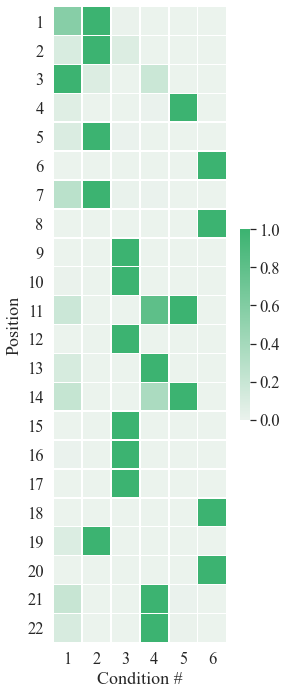

In [61]:
fig, ax = plt.subplots(figsize=(4.5,10))

sns.heatmap(final_pdfs, ax=ax, linewidths=.5, linecolor=None, cbar_kws={'shrink': .3},
            square=True, cmap=cmap)

ax.set_yticklabels(range(1, 23), rotation=0)
ax.set_xticklabels(range(1, 7), rotation=0)

ax.set_xlabel('Condition #')

plt.tight_layout()
plt.show()

fig.savefig(figure_dir + '/PDF_heatmap.png')
fig.savefig(figure_dir + '/PDF_heatmap.svg')

# CONTROL PLOTS

In [62]:
pc1_df = controls_bc_df
pc1_df

,Filename,Barcodes,Condition,A%,C%,G%,T%,Length,A_aitch,C_aitch,G_aitch,T_aitch
0,Control,AATTTTGCGG,1,0.135076,0.237882,0.558091,0.068951,2.380663,-0.328049,0.237891,1.090640,-1.000483
1,Control,TGACTTTTAA,1,0.108198,0.259366,0.535040,0.097395,2.245217,-0.591864,0.282411,1.006511,-0.697057
2,Control,TAACAGTATG,1,0.110600,0.273327,0.520516,0.095557,2.466897,-0.576861,0.327885,0.972037,-0.723061
3,Control,AGTTTTTCAA,2,0.084250,0.271443,0.570239,0.074067,2.378713,-0.738354,0.431611,1.173913,-0.867170
4,Control,GGTTACACTT,2,0.084703,0.273646,0.573650,0.068002,2.475653,-0.716483,0.456200,1.196386,-0.936102
5,Control,TCTTAGCATT,2,0.081205,0.283344,0.565542,0.069908,2.344722,-0.760176,0.489510,1.180633,-0.909968
6,Control,"TTTTTGTGAA,GTTATACTGT,CAACTCGGTC",3,0.018632,0.404438,0.551415,0.025515,2.565145,-1.694913,1.382722,1.692711,-1.380521
7,Control,CAATTGTCAT,3,0.029499,0.381278,0.566214,0.023009,2.699618,-1.316340,1.242849,1.638292,-1.564801
8,Control,GCCGCTCAGT,3,0.024243,0.363225,0.577253,0.035279,2.692862,-1.563060,1.143846,1.607105,-1.187891
9,Control,TATAGCCACC,4,0.123244,0.251563,0.505112,0.120081,2.487194,-0.524536,0.188993,0.886079,-0.550535


In [63]:
sns.set(style='whitegrid', font='Times New Roman')

In [64]:
#F9390A
#199E6E

In [69]:
pc1_df = pc1_df.drop([18, 19, 20, 21, 22, 23])  # conditions 7 and 8

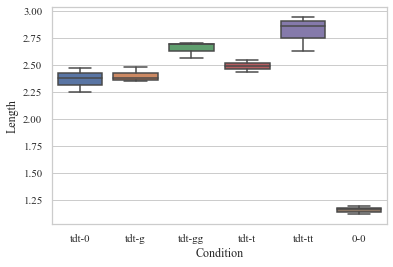

In [70]:
sns.boxplot(data=pc1_df, x='Condition', y='Length')
plt.xticks(ticks=range(6), labels =['tdt-0', 'tdt-g', 'tdt-gg', 'tdt-t', 'tdt-tt', '0-0'])
plt.savefig(figure_dir + 'Length_Controls')
plt.savefig(figure_dir + 'Length_Controls.svg')

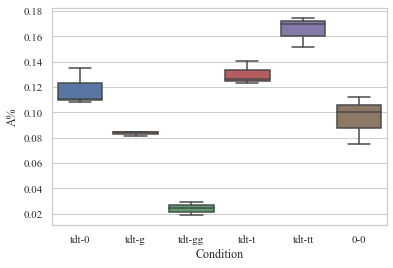

In [71]:
sns.boxplot(data=pc1_df, x='Condition', y='A%')
plt.xticks(ticks=range(6), labels =['tdt-0', 'tdt-g', 'tdt-gg', 'tdt-t', 'tdt-tt', '0-0'])
plt.savefig(figure_dir + 'A_Controls')
plt.savefig(figure_dir + 'A_Controls.svg')

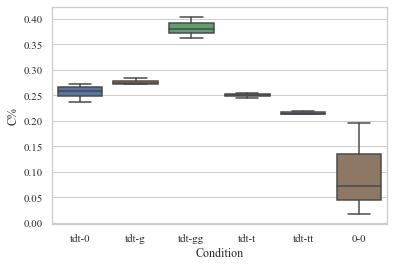

In [72]:
sns.boxplot(data=pc1_df, x='Condition', y='C%')
plt.xticks(ticks=range(6), labels =['tdt-0', 'tdt-g', 'tdt-gg', 'tdt-t', 'tdt-tt', '0-0'])
plt.savefig(figure_dir + 'C_Controls')
plt.savefig(figure_dir + 'C_Controls.svg')

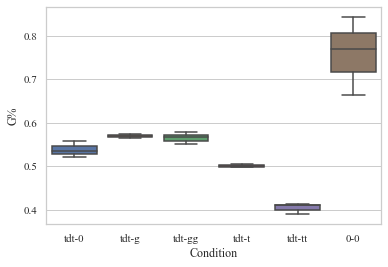

In [73]:
sns.boxplot(data=pc1_df, x='Condition', y='G%')
plt.xticks(ticks=range(6), labels =['tdt-0', 'tdt-g', 'tdt-gg', 'tdt-t', 'tdt-tt', '0-0'])
plt.savefig(figure_dir + 'G_Controls')
plt.savefig(figure_dir + 'G_Controls.svg')

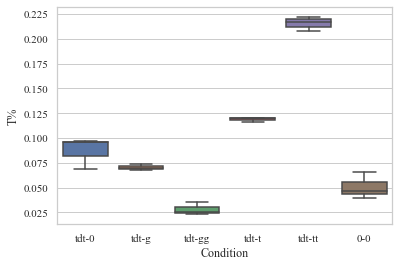

In [74]:
sns.boxplot(data=pc1_df, x='Condition', y='T%')
plt.xticks(ticks=range(6), labels =['tdt-0', 'tdt-g', 'tdt-gg', 'tdt-t', 'tdt-tt', '0-0'])
plt.savefig(figure_dir + 'T_Controls')
plt.savefig(figure_dir + 'T_Controls.svg')

In [111]:
pc1_sub_df = pc1_df.melt(id_vars=['Condition'], value_vars=['A%', 'C%', 'G%', 'T%'], var_name='Base', value_name='% Incorporation')
pc1_sub_df['% Incorporation'] *= 100
pc1_sub_df['Condition'] = pc1_sub_df['Condition'].astype(str)
pc1_sub_df

,Condition,Base,% Incorporation
0,1,A%,13.507550
1,1,A%,10.819846
2,1,A%,11.060023
3,2,A%,8.425004
4,2,A%,8.470296
...,...,...,...
67,5,T%,21.718490
68,5,T%,22.235867
69,6,T%,6.535948
70,6,T%,4.658385


In [115]:
sns.set(style='white', font='Arial', font_scale=1.5, rc={'lines.linewidth': 5})
palette = sns.color_palette(['lightsteelblue', 'salmon', 'mediumseagreen', 'khaki'])

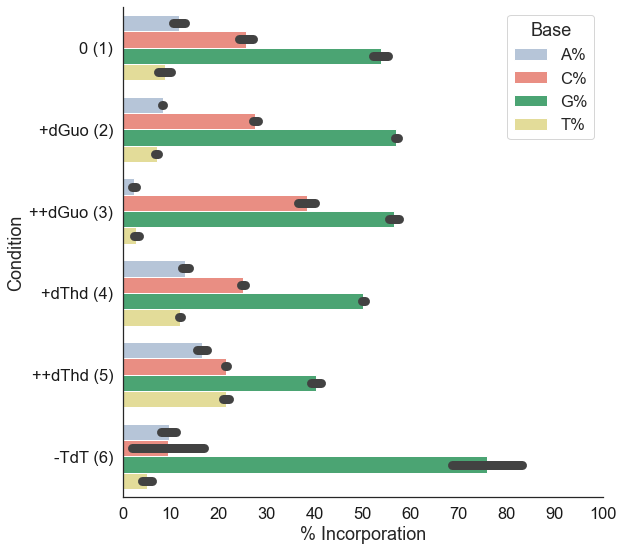

In [134]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(color='0.6', labelcolor='k')

plt.xlim(0, 6)

ax.set_xticks(range(0, 101, 10))

sns.barplot(data=pc1_sub_df, x='% Incorporation', y='Condition', hue='Base', #color='mediumseagreen',
            ci='sd', palette=palette)

ax.set_yticklabels(['0 (1)', '+dGuo (2)', '++dGuo (3)', '+dThd (4)', '++dThd (5)', '-TdT (6)'], rotation=0)

plt.tight_layout()
plt.show()

fig.savefig(figure_dir + '/dNTP_comps_hello_world.png')
fig.savefig(figure_dir + '/dNTP_comps_hello_world.svg')

In [147]:
pc1_len_df = pc1_df[['Condition', 'Length']]
pc1_len_df['Condition'] = pc1_len_df['Condition'].astype(str)
pc1_len_df

<ipython-input-147-676a5426c5b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc1_len_df['Condition'] = pc1_len_df['Condition'].astype(str)


,Condition,Length
0,1,2.380663
1,1,2.245217
2,1,2.466897
3,2,2.378713
4,2,2.475653
5,2,2.344722
6,3,2.565145
7,3,2.699618
8,3,2.692862
9,4,2.487194


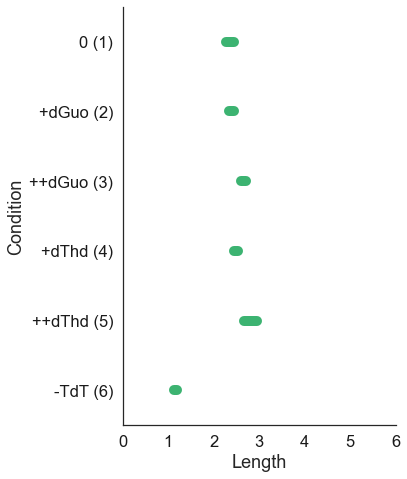

In [160]:
fig, ax = plt.subplots(figsize=(6, 7))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(color='0.6', labelcolor='k')

plt.xlim(0, 6)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])

sns.pointplot(data=pc1_len_df, x='Length', y='Condition', color='mediumseagreen',
              markers='', linestyles='', errwidth=10, ci='sd')

ax.set_yticklabels(['0 (1)', '+dGuo (2)', '++dGuo (3)', '+dThd (4)', '++dThd (5)', '-TdT (6)'], rotation=0)

plt.tight_layout()
plt.show()

fig.savefig(figure_dir + '/lengths_hello_world.png')
fig.savefig(figure_dir + '/lengths_hello_world.svg')

# Make heatmap of controls

In [75]:
conditions_df_mean_pc1 = conditions_df_mean
conditions_df_std_pc1 = conditions_df_std
conditions_df_mean_pc1

,Length,A_aitch,C_aitch,G_aitch,T_aitch
Condition,,,,,
1.0,2.364259,-0.498925,0.282729,1.023062,-0.806867
2.0,2.399696,-0.738338,0.459107,1.183644,-0.904413
3.0,2.652542,-1.524771,1.256473,1.646036,-1.377738
4.0,2.486061,-0.479186,0.175961,0.870232,-0.567008
5.0,2.811204,-0.357416,-0.090460,0.537345,-0.089469
6.0,1.154303,-0.252143,-0.679443,1.827570,-0.895983
7.0,1.635604,0.351444,-1.323564,2.213820,-1.241699
8.0,1.374666,-0.073469,-0.255967,1.652063,-1.322627


In [76]:
control_pdfs = pd.DataFrame(columns=['Condition 1', 'Condition 2', 'PDF_len', 'PDF_A', 'PDF_C', 'PDF_G', 'PDF_T'])

for condition, avg_len, std_len, avg_aitch, std_aitch in zip(
    conditions_df_mean_pc1.index,
    conditions_df_mean_pc1.Length,
    conditions_df_std_pc1.Length,
    conditions_df_mean_pc1.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values,
    conditions_df_std_pc1.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values):
    
    length_dist = scipy.stats.norm(avg_len, std_len)

    a_dist = scipy.stats.norm(avg_aitch[0], std_aitch[0])
    c_dist = scipy.stats.norm(avg_aitch[1], std_aitch[1])
    g_dist = scipy.stats.norm(avg_aitch[2], std_aitch[2])
    t_dist = scipy.stats.norm(avg_aitch[3], std_aitch[3])

    if condition in [7,8]:
        continue
    print(condition)
    
    for condition2, avg_len, avg_aitch in zip(
        conditions_df_mean_pc1.index,
        conditions_df_mean_pc1.Length,
        conditions_df_mean_pc1.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values,
    ):
        if condition2 in [7,8]:
            continue
        
        len_pdf = length_dist.pdf(avg_len)
        a_pdf = a_dist.pdf(avg_aitch[0])
        c_pdf = c_dist.pdf(avg_aitch[1])
        g_pdf = g_dist.pdf(avg_aitch[2])
        t_pdf = t_dist.pdf(avg_aitch[3])
        
        this_cond_pdfs = {
            'Condition 1': condition,
            'Condition 2': condition2,
            'PDF_len': len_pdf,
            'PDF_A': a_pdf,
            'PDF_C': c_pdf,
            'PDF_G': g_pdf,
            'PDF_T': t_pdf
        }
        
        control_pdfs = control_pdfs.append(this_cond_pdfs, ignore_index=True)

1.0
2.0
3.0
4.0
5.0
6.0


In [77]:
control_pdfs

,Condition 1,Condition 2,PDF_len,PDF_A,PDF_C,PDF_G,PDF_T
0,1.0,1.0,3.570068e+00,2.692409e+00,8.865811e+00,6.539005e+00,2.372120e+00
1,1.0,2.0,3.394999e+00,7.298522e-01,4.087554e-03,2.047208e-01,2.004863e+00
2,1.0,3.0,1.280828e-01,1.051510e-10,1.827869e-101,1.494303e-22,7.467272e-03
3,1.0,4.0,1.971018e+00,2.668624e+00,5.311393e-01,2.837158e-01,8.579151e-01
4,1.0,5.0,1.199389e-03,1.706421e+00,1.027798e-14,1.127527e-13,2.654330e-04
5,1.0,6.0,1.243244e-25,6.726672e-01,4.615999e-99,1.139660e-37,2.061415e+00
6,2.0,1.0,5.125144e+00,1.522295e-25,1.373363e-07,2.845669e-41,2.255194e-01
7,2.0,2.0,5.871923e+00,1.826128e+01,1.372871e+01,3.458593e+01,1.146381e+01
8,2.0,3.0,5.771290e-03,7.306987e-281,4.376866e-163,0.000000e+00,7.738211e-40
9,2.0,4.0,2.617505e+00,5.068374e-30,3.320460e-20,1.688568e-159,4.434097e-20


In [78]:
control_pdfs['PDF_Total'] = control_pdfs['PDF_len'] * (control_pdfs['PDF_A'] + control_pdfs['PDF_C'] + control_pdfs['PDF_G'] + control_pdfs['PDF_T'])

In [79]:
control_pdfs

,Condition 1,Condition 2,PDF_len,PDF_A,PDF_C,PDF_G,PDF_T,PDF_Total
0,1.0,1.0,3.570068e+00,2.692409e+00,8.865811e+00,6.539005e+00,2.372120e+00,7.307695e+01
1,1.0,2.0,3.394999e+00,7.298522e-01,4.087554e-03,2.047208e-01,2.004863e+00,9.993258e+00
2,1.0,3.0,1.280828e-01,1.051510e-10,1.827869e-101,1.494303e-22,7.467272e-03,9.564289e-04
3,1.0,4.0,1.971018e+00,2.668624e+00,5.311393e-01,2.837158e-01,8.579151e-01,8.556966e+00
4,1.0,5.0,1.199389e-03,1.706421e+00,1.027798e-14,1.127527e-13,2.654330e-04,2.046981e-03
5,1.0,6.0,1.243244e-25,6.726672e-01,4.615999e-99,1.139660e-37,2.061415e+00,3.399131e-25
6,2.0,1.0,5.125144e+00,1.522295e-25,1.373363e-07,2.845669e-41,2.255194e-01,1.155820e+00
7,2.0,2.0,5.871923e+00,1.826128e+01,1.372871e+01,3.458593e+01,1.146381e+01,4.582432e+02
8,2.0,3.0,5.771290e-03,7.306987e-281,4.376866e-163,0.000000e+00,7.738211e-40,4.465946e-42
9,2.0,4.0,2.617505e+00,5.068374e-30,3.320460e-20,1.688568e-159,4.434097e-20,2.029759e-19


In [83]:
heatmap_data = control_pdfs.pivot(index='Condition 1', columns=['Condition 2'])['PDF_Total']
heatmap_data = heatmap_data.apply(lambda x: x / max(x))

In [84]:
heatmap_data

Condition 2,1.0,2.0,3.0,4.0,5.0,6.0
Condition 1,,,,,,
1.0,1.000000e+00,2.180776e-02,1.086026e-05,1.857194e-02,1.922215e-05,6.535943e-27
2.0,1.581648e-02,1.000000e+00,5.071085e-44,4.405366e-22,1.041932e-74,1.366176e-73
3.0,1.114792e-06,3.983258e-06,1.000000e+00,2.083223e-07,1.120238e-10,1.005126e-87
4.0,5.652148e-02,5.521067e-06,8.132273e-64,1.000000e+00,3.492481e-09,1.867504e-125
5.0,5.271365e-04,9.538431e-11,4.107317e-69,8.431375e-04,1.000000e+00,1.266512e-23
6.0,4.546905e-209,2.351015e-222,5.522172e-320,8.492497e-254,0.000000e+00,1.000000e+00


In [86]:
sns.set(font='Times New Roman', font_scale=1.5)
cmap = sns.color_palette("light:mediumseagreen", as_cmap=True)

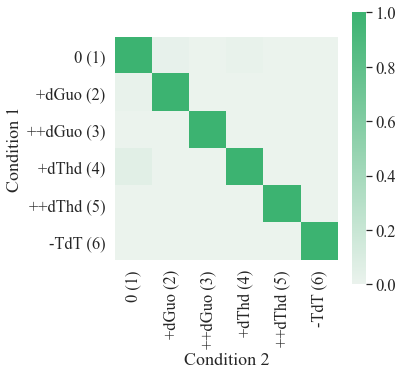

In [96]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(data=heatmap_data, square=True, cmap=cmap)

ax.set_xticklabels(['0 (1)', '+dGuo (2)', '++dGuo (3)', '+dThd (4)', '++dThd (5)', '-TdT (6)'], rotation=90)
ax.set_yticklabels(['0 (1)', '+dGuo (2)', '++dGuo (3)', '+dThd (4)', '++dThd (5)', '-TdT (6)'], rotation=0)

fig.savefig('Controls_CrossTalk')
fig.savefig('Controls_CrossTalk.svg')